# Hyper-parameters in Action!

## Circles Dataset

In [ ]:
# To run this notebook on Google Colab, you need to run these two commands first
# to install FFMPEG (to generate animations - it may take a while to install!)
# and the actual DeepReplay package

#!sudo apt-get install ffmpeg
#!pip install deepreplay

In [4]:
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.optimizers import SGD
from keras.initializers import he_normal, normal

from deepreplay.callbacks import ReplayData
from deepreplay.replay import Replay
from deepreplay.plot import compose_animations, compose_plots

import matplotlib.pyplot as plt
from IPython.display import HTML
from sklearn.datasets import make_circles

%matplotlib inline

### Loads data and creates ReplayData callback

In [2]:
group_name = 'circles'

X, y = make_circles(n_samples=2000, random_state=27, noise=0.03)

replaydata = ReplayData(X, y, filename='circles_dataset.h5', group_name=group_name)

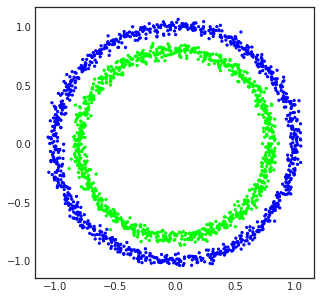

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(*X.transpose(), c=y, cmap=plt.cm.brg, s=5)

### Builds Keras model

In [7]:
sgd = SGD(lr=0.01)

he_initializer = he_normal(seed=42)
normal_initializer = normal(seed=42)

model = Sequential()
# 1st hidden layer with 5 units, taking the 2 features as inputs
model.add(Dense(input_dim=2,
                units=5,
                kernel_initializer=he_initializer))
# Activation as a separate layer, just for kicks - DeepReplay can handle it!
model.add(Activation('relu'))

# 2nd hidden layer with 3 units
model.add(Dense(units=3,
                kernel_initializer=he_initializer))
model.add(Activation('relu'))

# Added layer to allow plotting the feature space
# It has 2 units and uses a LINEAR activation, so the network will also learn the
# mapping from 3-dimensions to 2-dimensions
model.add(Dense(units=2,
                kernel_initializer=normal_initializer,
                activation='linear',
                name='hidden'))

# Typical output layer for binary classification
model.add(Dense(units=1,
                kernel_initializer=normal_initializer,
                activation='sigmoid',
                name='output'))

model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['acc'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 5)                 15        
_________________________________________________________________
activation_3 (Activation)    (None, 5)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 18        
_________________________________________________________________
activation_4 (Activation)    (None, 3)                 0         
_________________________________________________________________
hidden (Dense)               (None, 2)                 8         
_________________________________________________________________
output (Dense)               (None, 1)                 3         
Total params: 44
Trainable params: 44
Non-trainable params: 0
_________________________________________________________________
None


### Trains the model using ReplayData as a callback to store the information

In [8]:
model.fit(X, y, epochs=300, batch_size=16, callbacks=[replaydata])

Epoch 1/300
2000/2000 [==============================] - 0s 46us/step - loss: 0.6932 - acc: 0.4865
Epoch 2/300
2000/2000 [==============================] - 0s 38us/step - loss: 0.6932 - acc: 0.4905
Epoch 3/300
2000/2000 [==============================] - 0s 38us/step - loss: 0.6932 - acc: 0.4865
Epoch 4/300
2000/2000 [==============================] - 0s 38us/step - loss: 0.6932 - acc: 0.4840
Epoch 5/300
2000/2000 [==============================] - 0s 39us/step - loss: 0.6933 - acc: 0.4895
Epoch 6/300
2000/2000 [==============================] - 0s 39us/step - loss: 0.6932 - acc: 0.4950
Epoch 7/300
2000/2000 [==============================] - 0s 39us/step - loss: 0.6932 - acc: 0.4775
Epoch 8/300
2000/2000 [==============================] - 0s 39us/step - loss: 0.6932 - acc: 0.4990
Epoch 9/300
2000/2000 [==============================] - 0s 39us/step - loss: 0.6932 - acc: 0.4885
Epoch 10/300
2000/2000 [==============================] - 0s 39us/step - loss: 0.6932 - acc: 0.4980
Epoch 11/

2000/2000 [==============================] - 0s 40us/step - loss: 0.6930 - acc: 0.5195
Epoch 84/300
2000/2000 [==============================] - 0s 39us/step - loss: 0.6930 - acc: 0.5480
Epoch 85/300
2000/2000 [==============================] - 0s 38us/step - loss: 0.6929 - acc: 0.5115
Epoch 86/300
2000/2000 [==============================] - 0s 38us/step - loss: 0.6929 - acc: 0.5265
Epoch 87/300
2000/2000 [==============================] - 0s 38us/step - loss: 0.6929 - acc: 0.5125
Epoch 88/300
2000/2000 [==============================] - 0s 38us/step - loss: 0.6929 - acc: 0.5215
Epoch 89/300
2000/2000 [==============================] - 0s 38us/step - loss: 0.6929 - acc: 0.5185
Epoch 90/300
2000/2000 [==============================] - 0s 38us/step - loss: 0.6929 - acc: 0.5240
Epoch 91/300
2000/2000 [==============================] - 0s 38us/step - loss: 0.6929 - acc: 0.5355
Epoch 92/300
2000/2000 [==============================] - 0s 38us/step - loss: 0.6928 - acc: 0.5255
Epoch 93/300


2000/2000 [==============================] - 0s 40us/step - loss: 0.0620 - acc: 0.9880
Epoch 246/300
2000/2000 [==============================] - 0s 62us/step - loss: 0.0586 - acc: 0.9870
Epoch 247/300
2000/2000 [==============================] - 0s 43us/step - loss: 0.0559 - acc: 0.9900
Epoch 248/300
2000/2000 [==============================] - 0s 42us/step - loss: 0.0535 - acc: 0.9905
Epoch 249/300
2000/2000 [==============================] - 0s 42us/step - loss: 0.0518 - acc: 0.9900
Epoch 250/300
2000/2000 [==============================] - 0s 54us/step - loss: 0.0511 - acc: 0.9890
Epoch 251/300
2000/2000 [==============================] - 0s 41us/step - loss: 0.0495 - acc: 0.9915
Epoch 252/300
2000/2000 [==============================] - 0s 43us/step - loss: 0.0489 - acc: 0.9885
Epoch 253/300
2000/2000 [==============================] - 0s 43us/step - loss: 0.0457 - acc: 0.9890
Epoch 254/300
2000/2000 [==============================] - 0s 39us/step - loss: 0.0465 - acc: 0.9890
Epoc

### Builds figure to attach the plots to

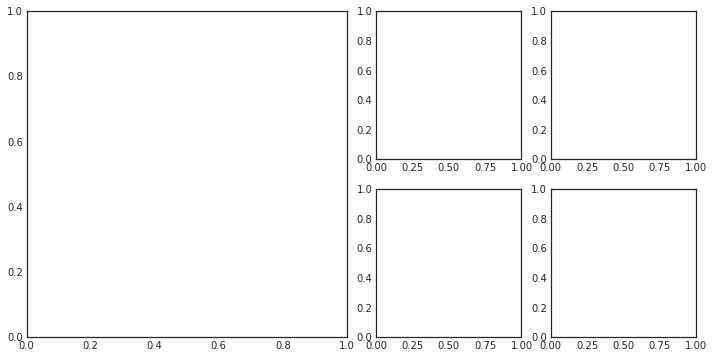

In [9]:
fig = plt.figure(figsize=(12, 6))
ax_fs = plt.subplot2grid((2, 4), (0, 0), colspan=2, rowspan=2)
ax_ph_neg = plt.subplot2grid((2, 4), (0, 2))
ax_ph_pos = plt.subplot2grid((2, 4), (1, 2))
ax_lm = plt.subplot2grid((2, 4), (0, 3))
ax_lh = plt.subplot2grid((2, 4), (1, 3))

### Loads data into Replay and builds the plots

In [10]:
replay = Replay(replay_filename='circles_dataset.h5', group_name=group_name)

fs = replay.build_feature_space(ax_fs, layer_name='hidden',
                                display_grid=False, scale_fixed=False)
ph = replay.build_probability_histogram(ax_ph_neg, ax_ph_pos)
lh = replay.build_loss_histogram(ax_lh)
lm = replay.build_loss_and_metric(ax_lm, 'acc')

### Plotting the figure for 280th epoch

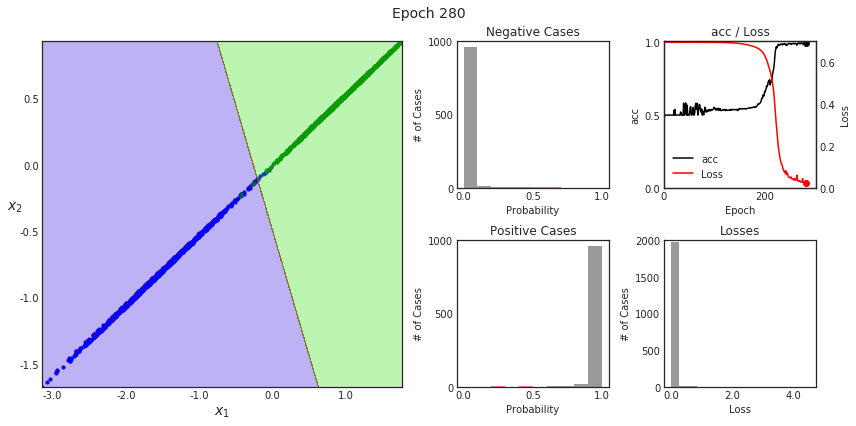

In [11]:
sample_figure = compose_plots([fs, ph, lm, lh], 280)
sample_figure

### Animating the plot

In [12]:
sample_anim = compose_animations([fs, ph, lm, lh])
HTML(sample_anim.to_html5_video())